In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


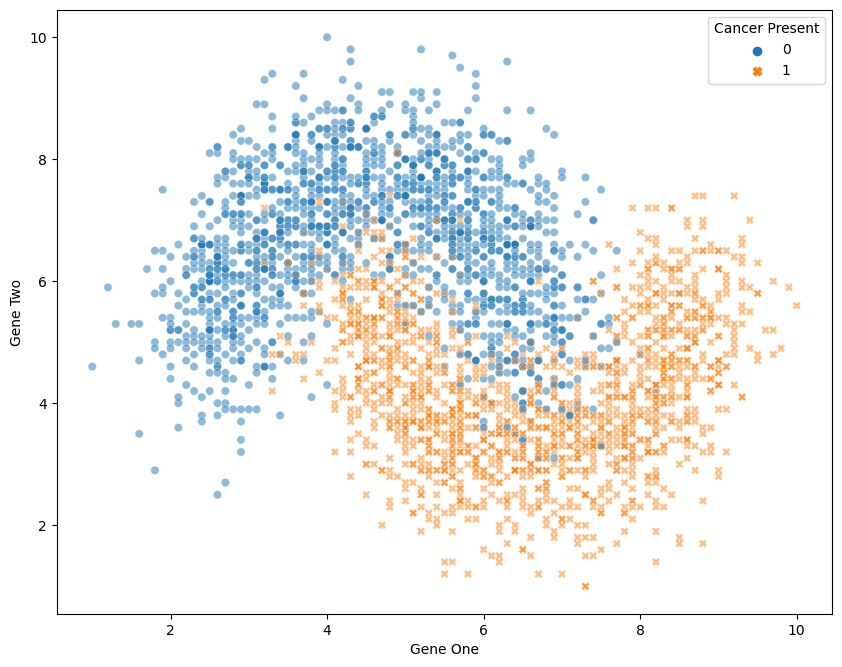

In [4]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(x="Gene One", y="Gene Two", hue="Cancer Present", data=df, alpha=0.5, style="Cancer Present");

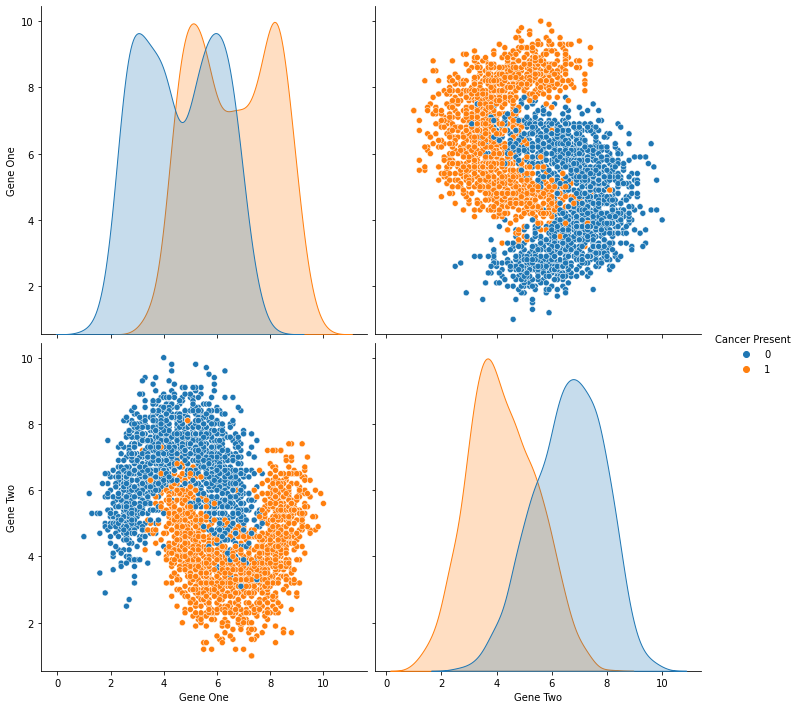

In [5]:
sns.pairplot(data=df, hue="Cancer Present", height=5);

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X = df.drop("Cancer Present", axis=1)
y = df["Cancer Present"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train)

In [12]:
scaled_X_test = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = knn_model.predict(scaled_X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900

